In [1]:
from docx import Document
import pandas as pd
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


In [3]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Raiyana
[nltk_data]     Reyaz\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Raiyana
[nltk_data]     Reyaz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to C:\Users\Raiyana
[nltk_data]     Reyaz\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [6]:
file_path = r"C:\Users\Raiyana Reyaz\OneDrive\Desktop\data science assignments\NLP\amazonreviews.docx"   # your uploaded file path
doc = Document(file_path)

# Data Cleaning

In [9]:
import re
lines = [para.text.strip() for para in doc.paragraphs if para.text.strip()]

data = []

for line in lines:
    # Match: pos <space> review text...
    match = re.match(r'^(pos|neg)\s+(.*)$', line, re.IGNORECASE)
    
    if match:
        label = match.group(1).lower()
        review = match.group(2).strip()
        data.append([label, review])

df = pd.DataFrame(data, columns=['label', 'review'])

print(df.head())
print("Total reviews extracted:", len(df))

  label                                             review
0   pos  Stuning even for the non-gamer: This sound tra...
1   pos  The best soundtrack ever to anything.: I'm rea...
2   pos  "Amazing!: This soundtrack is my favorite musi...
3   pos  Excellent Soundtrack: I truly like this soundt...
4   pos  Remember, Pull Your Jaw Off The Floor After He...
Total reviews extracted: 10000


In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.dropna(subset=['review'], inplace=True)
df = df[df['review'].str.strip() != ""]

In [12]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
punct = string.punctuation

def clean_text(text):
    # lowercase
    text = text.lower()

    # remove punctuation
    text = "".join(ch for ch in text if ch not in punct)

    # tokenize
    tokens = nltk.word_tokenize(text)

    # remove stopwords + lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]

    # join back into sentence
    return " ".join(tokens)

df['review_clean'] = df['review'].apply(clean_text)

# SHOW CLEANED DATA
df.head()

,label,review,review_clean
0,pos,Stuning even for the non-gamer: This sound tra...,stuning even nongamer sound track beautiful pa...
1,pos,The best soundtrack ever to anything.: I'm rea...,best soundtrack ever anything im reading lot r...
2,pos,"""Amazing!: This soundtrack is my favorite musi...",amazing soundtrack favorite music time hand in...
3,pos,Excellent Soundtrack: I truly like this soundt...,excellent soundtrack truly like soundtrack enj...
4,pos,"Remember, Pull Your Jaw Off The Floor After He...",remember pull jaw floor hearing youve played g...


In [13]:
df_clean = df[['label', 'review_clean']]
df_clean.head()

,label,review_clean
0,pos,stuning even nongamer sound track beautiful pa...
1,pos,best soundtrack ever anything im reading lot r...
2,pos,amazing soundtrack favorite music time hand in...
3,pos,excellent soundtrack truly like soundtrack enj...
4,pos,remember pull jaw floor hearing youve played g...


# Exploratory Analysis: 

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import nltk


C:\Users\Raiyana Reyaz\AppData\Local\Temp\ipykernel_31896\851303504.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_clean, x='label', palette='viridis')


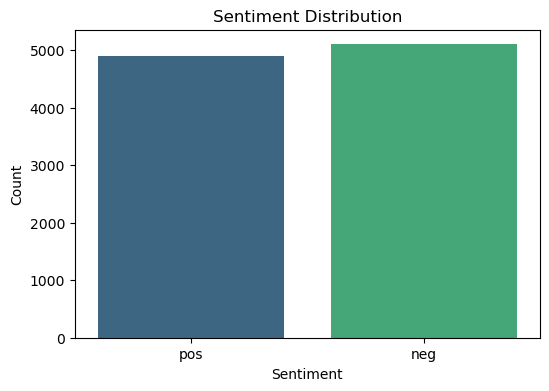

In [15]:
# 1. SENTIMENT DISTRIBUTION
plt.figure(figsize=(6,4))
sns.countplot(data=df_clean, x='label', palette='viridis')
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

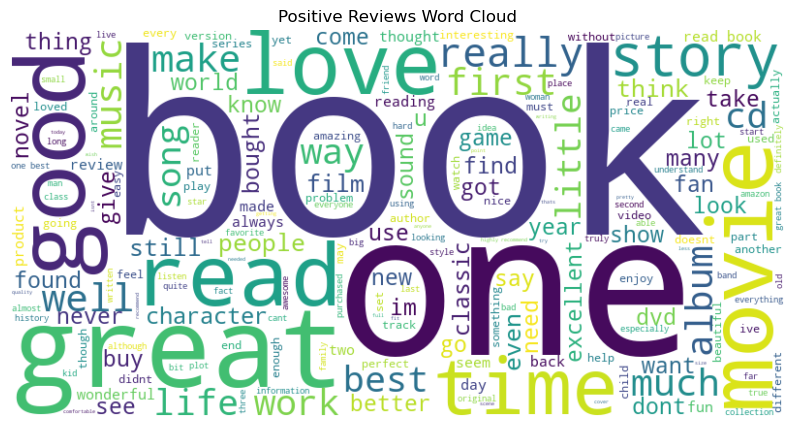

In [16]:
#  2. WORD CLOUDS
pos_text = " ".join(df_clean[df_clean['label']=='pos']['review_clean'])
neg_text = " ".join(df_clean[df_clean['label']=='neg']['review_clean'])

# POSITIVE WORD CLOUD
plt.figure(figsize=(10,6))
wc_pos = WordCloud(width=800, height=400, background_color='white').generate(pos_text)
plt.imshow(wc_pos, interpolation='bilinear')
plt.axis('off')
plt.title("Positive Reviews Word Cloud")
plt.show()

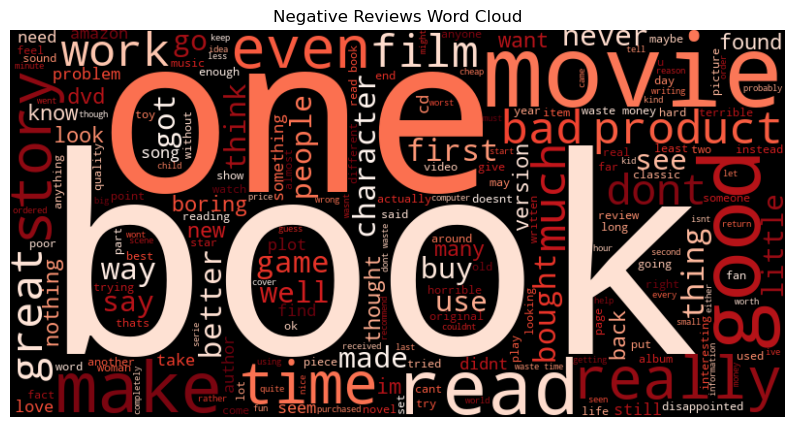

In [17]:
# NEGATIVE WORD CLOUD
plt.figure(figsize=(10,6))
wc_neg = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(neg_text)
plt.imshow(wc_neg, interpolation='bilinear')
plt.axis('off')
plt.title("Negative Reviews Word Cloud")
plt.show()


C:\Users\Raiyana Reyaz\AppData\Local\Temp\ipykernel_31896\3500193428.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='Greens_r')


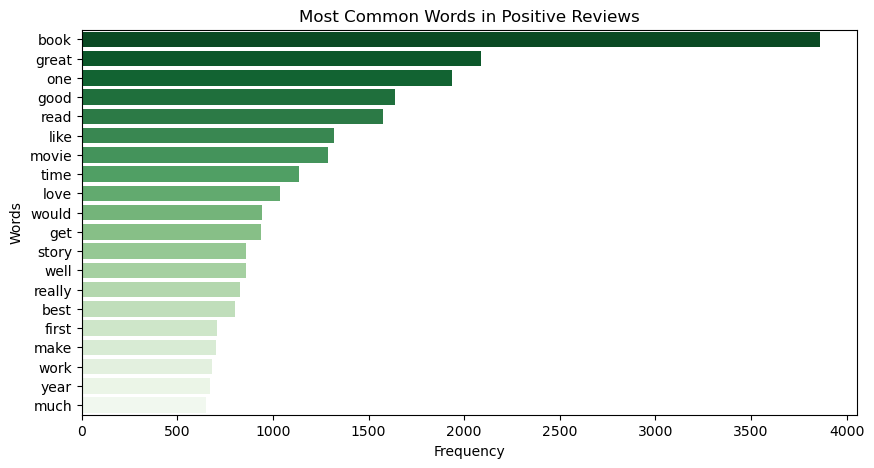

In [18]:
# 3. MOST COMMON WORDS IN POSITIVE REVIEWS

pos_words = pos_text.split()
pos_common = Counter(pos_words).most_common(20)

plt.figure(figsize=(10,5))
words, counts = zip(*pos_common)
sns.barplot(x=list(counts), y=list(words), palette='Greens_r')
plt.title("Most Common Words in Positive Reviews")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.show()


C:\Users\Raiyana Reyaz\AppData\Local\Temp\ipykernel_31896\2981003870.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='Reds_r')


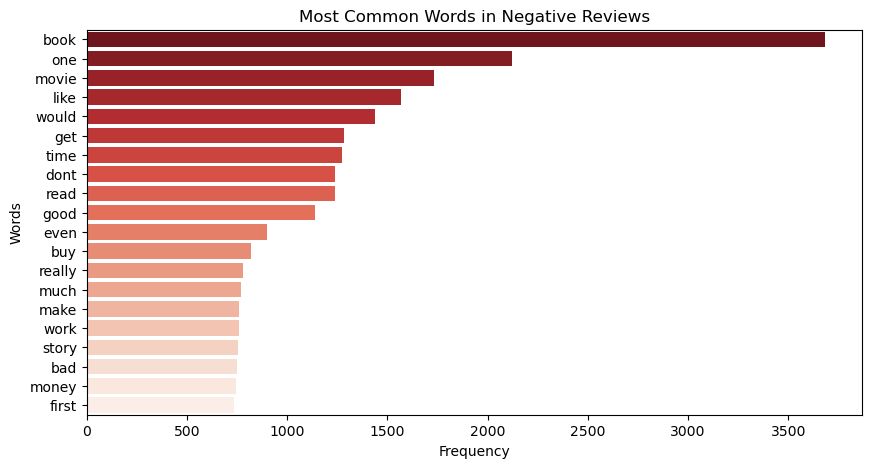

In [19]:
# 4. MOST COMMON WORDS IN NEGATIVE REVIEWS

neg_words = neg_text.split()
neg_common = Counter(neg_words).most_common(20)

plt.figure(figsize=(10,5))
words, counts = zip(*neg_common)
sns.barplot(x=list(counts), y=list(words), palette='Reds_r')
plt.title("Most Common Words in Negative Reviews")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.show()

# Model Development:

In [20]:
from sklearn.model_selection import train_test_split

X = df_clean['review_clean']
y = df_clean['label']

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42, stratify=y)

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [22]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=200)
model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=200)

In [23]:
from sklearn.metrics import accuracy_score, f1_score, classification_report

y_pred = model.predict(X_test_tfidf)

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Test F1-score:", f1_score(y_test, y_pred, pos_label='pos'))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Test Accuracy: 0.852
Test F1-score: 0.8495934959349594

Classification Report:
               precision    recall  f1-score   support

         neg       0.86      0.85      0.85      1019
         pos       0.85      0.85      0.85       981

    accuracy                           0.85      2000
   macro avg       0.85      0.85      0.85      2000
weighted avg       0.85      0.85      0.85      2000



In [24]:
from sklearn.model_selection import cross_val_score

# Cross-validation on the full TF-IDF pipeline
cv_scores = cross_val_score(model, tfidf.transform(X), y, cv=5, scoring='accuracy')

print("Cross-validation accuracies:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())
print("Std Dev:", cv_scores.std())

Cross-validation accuracies: [0.857  0.829  0.8265 0.831  0.8515]
Mean CV Accuracy: 0.8390000000000001
Std Dev: 0.012653062870309319
